# Error Correcting Codes for MERFISH

The [MERFISH](http://zhuang.harvard.edu/merfish.html) protocol is a combinatorial barcoding strategy for identifying hundreds of different species of RNA using tens of rounds of in-situ imaging. 

Trident-shaped probes are designed for each target: the base of the trident hybridizes to the target, and the prongs are available for each round. Suppose that each probe has 4 arms and we image in 16 rounds, so each probe will light up 4 times. Given the flourescence images from each round, a given RNA species is identifiable as a localized spot showing up in 4 of the 16 rounds. To enable denoising (against a round of missed binding or a round a round of spurious binding) the sets of rounds chosen for each probe are selected to be an error correcting code. In this case, the code would have weight 4 and length 16, and be represented by binary vectors of length 16.

In this notebook, we discuss the set of error correcting codes of weight 4.

In [2]:
import numpy as np
import scipy as sp
from scipy import stats as stats
from matplotlib import pyplot as plt
%matplotlib inline

Graham gives a [construction](http://www.math.ucsd.edu/~ronspubs/80_05_constant_weight.pdf) of error-correcting codes using the cyclic group. Any fiber of the map $T: \mathbb{F}_w^n \rightarrow \mathbb{Z}/n$ given by $T: a \rightarrow \sum_i i * a_i$ has Hamming distance at least $4$. There are $n$ such preimages, so one has size at least ${n \choose w} / n$.

Johnson gives an upper bound. Dropping a single bit from a word $x$ of weight $w$ produces a word $y$ of weight $w-1$. Each $y$ can come from only one $x$ if we are to disambiguate, and there are $n \choose w-1$ such $y$. Each $x$ produces $w$ of them. So there are at most ${n \choose w-1} / w$ codewords.

These bounds determine the asymptotics precisely.

$$\frac{1}{w}{n-1\choose w-1} \leq A(n,4,w) \leq \frac{1}{w}{n\choose w-1}.$$

The ratio of lower to upper bound is $$\frac{n-w+1}{n} = 1 - \frac{w-1}{n}.$$

Since the upper bound is generated just by considering drop-outs, which are the most common failure mode in the experiment, it will be a dominant condition even if we put different probabilities on drop-out and false-in.

(Graham also gives a construction of $A(n,2\delta,w)$ for larger $\delta$ using finite fields.)

In [3]:
def comb(n,k):
    if k == 1:
        return n
    else:
        return float(n)/k * comb(n-1,k-1)

Text(0.5,1,'Upper and lower bounds for optimal codes.')

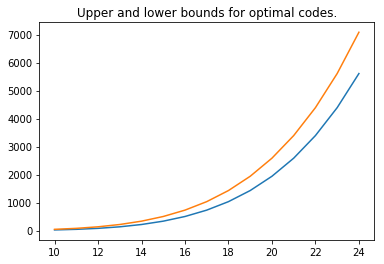

In [6]:
# fix w and plot the upper and lower bounds
w = 6
x = range(10,25)
lower = [comb(n-1, w-1)/w for n in x]
upper = [comb(n, w-1)/w for n in x]
plt.plot(x,lower)
plt.plot(x,upper)
plt.title("Upper and lower bounds for optimal codes.")

The ratio of the bounds still is not that close for small n. They get you 60% or so for the range Jeff Moffit is working in right now.

Text(0.5,1,'Ratio of lower to upper bound')

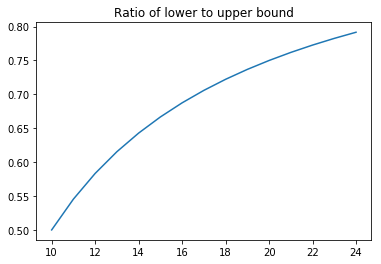

In [8]:
plt.plot(x,[a/b for (a,b) in zip(lower,upper)])
plt.title("Ratio of lower to upper bound")

For $n = 16$ and $w = 6$, for example the Graham-Sloane construction gives a codebook of size $501$, the upper bound is $728$, and the best known result is $624$, from a 2018 (announced) preprint. (The previous [best construction](https://web.archive.org/web/20160427044748/http://www.win.tue.nl/~aeb/preprints/cw4p.pdf) was $616$ using orbits of the dihedral group.)

While there is a [veritable zoo](http://sci-hub.cc/10.1109/18.59932) of construction methods, they all come down to using some symmetry to save work: if a code is invariant under the action of a group G, then you need only check for collisions among a representative of each orbit rather than under all n^2 pairs of codewords. The best possible bound for a given n will depend on some funny coincidences of small numbers (things like the existence of the sporadic simple [Mathieu group](https://en.wikipedia.org/wiki/Mathieu_group)). I expect that for your use case simplicity of construction will need to be traded off against squeezing out a slightly larger code. For example, the construction for 615 and 616 are rather different, but the gap between 600 and 500 may justify some additional complexity.

The most up-to-date set of constant weight codes is maintained [here](https://www.win.tue.nl/~aeb/codes/Andw.html).